# Laboratorio 6
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682

In [69]:
import numpy as np
import matplotlib.pylab as plt

#2. Generación de Señales


Grafique la señal x(n) con su respectivo vector de tiempo n para una frecuencia de muestreo de 1Hz.


ingrese el numero de cedula 2
17.0


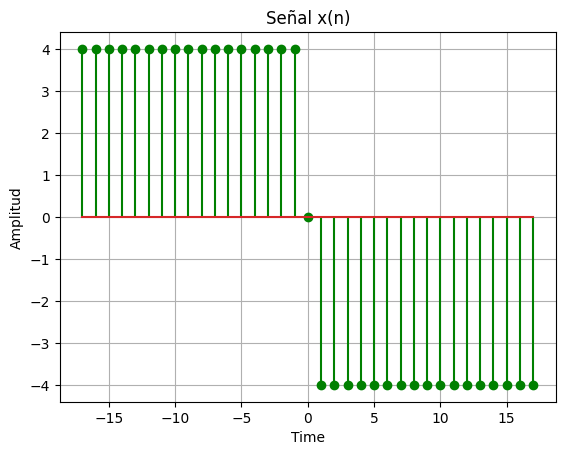

In [70]:
C=int(input("ingrese el numero de cedula "))

N =(30+ C*2)
inter=N/2
print(inter)
fs = 1  # Frecuencia de muestreo de 1Hz
n = np.arange(-int(N/2), int(N/2)+1)  # Vector de tiempo desde -inter hasta inter

xn1 = 2*C*(np.ones(int(N/2)))
xn2 = -2*C*(np.ones(int(N/2)))
xn = np.hstack((xn1,0,xn2)) # Señal resultante

plt.stem(n, xn,linefmt='g-',markerfmt='go')
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.title('Señal x(n)')
plt.grid()
plt.show()

* ¿Que puede decir sobre la señal graficada?
Es una señal bipolar impar  con amplitud de 4

* Es la señal par o impar. ¿Por qué?
la señal es impar ya que en la grafica se puede ver que si se refleja respecto al eje y,no tiene simetria reflectiva

#3 Coeficientes de la serie de Fourier

#3.1
Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.

In [71]:
k_max = 12 # Valor máximo de k
par = np.zeros(k_max+1)
impar = np.zeros(k_max+1)
C_k = np.empty(k_max + 1,'complex_') # coeficientes real, imaginaria

for k in range(k_max+1):
    par[k] = 1/N * np.sum(xn * np.cos(2*np.pi*k*n/N))
    impar[k] = 1/N * np.sum(xn * np.sin(2*np.pi*k*n/N))
    C_k[k] = (1/N)*sum((xn)*np.exp((-2j*np.pi*k*n)/N))


    print(f"El coeficiente par {k} es {par[k]}")
    print(f"El coeficiente impar {k} es {impar[k]}")


El coeficiente par 0 es 0.0
El coeficiente impar 0 es 0.0
El coeficiente par 1 es 0.0
El coeficiente impar 1 es -2.539227919355667
El coeficiente par 2 es 5.224578939412501e-17
El coeficiente impar 2 es 1.575377145493588e-17
El coeficiente par 3 es -5.224578939412501e-17
El coeficiente impar 3 es -0.8269730444041876
El coeficiente par 4 es 5.224578939412501e-17
El coeficiente impar 4 es 8.375333230399677e-17
El coeficiente par 5 es 3.9184342045593757e-17
El coeficiente impar 5 es -0.47253428846724493
El coeficiente par 6 es 0.0
El coeficiente impar 6 es 2.113841966774513e-17
El coeficiente par 7 es 3.9184342045593757e-17
El coeficiente impar 7 es -0.3115797666197992
El coeficiente par 8 es -3.9184342045593757e-17
El coeficiente impar 8 es -1.8178333323687572e-15
El coeficiente par 9 es 2.6122894697062506e-17
El coeficiente impar 9 es -0.21449893004085754
El coeficiente par 10 es -1.3061447348531253e-17
El coeficiente impar 10 es 2.8775201485117944e-16
El coeficiente par 11 es -5.224578

#3.2
Grafique en un subplot el espectro de potencia para la parte par y la impar.

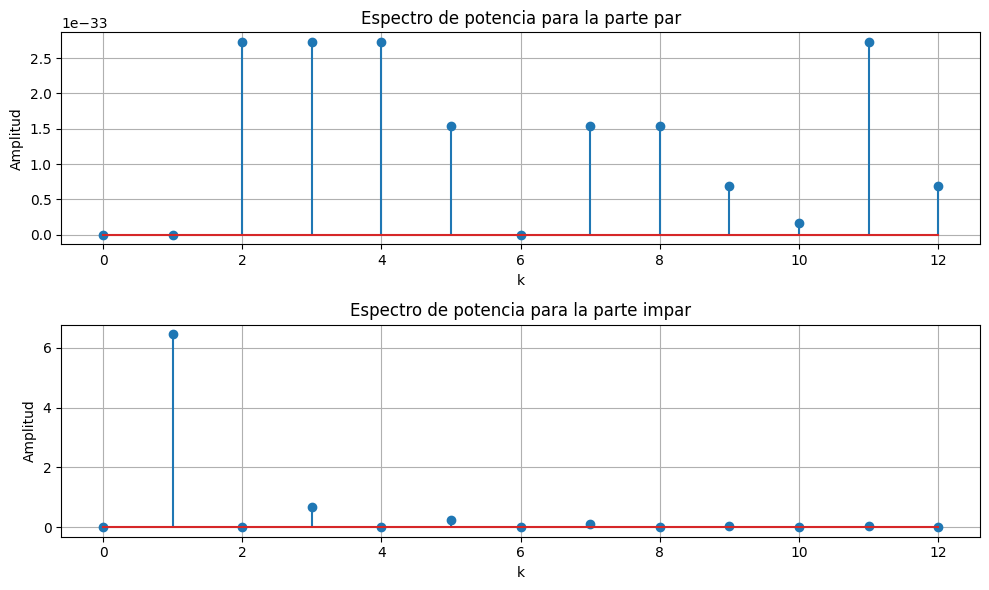

In [72]:
# Calcular espectro de potencia para parte par e impar
senal_par = (abs(par)**2)
senal_impar = (abs(impar)**2)

# Graficar espectros de potencia
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.stem(range(k_max+1), senal_par)
plt.title('Espectro de potencia para la parte par')
plt.xlabel('k')
plt.ylabel('Amplitud')
plt.grid()

plt.subplot(2,1,2)
plt.stem(range(k_max+1), senal_impar)
plt.title('Espectro de potencia para la parte impar')
plt.xlabel('k')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

¿Qué puede concluir apartir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por qué?


observando ambos espectros de potencia,la parte par e impar,se puede deducir que la señal original es impar,debido a que el espectro de potenica de la parte par da valores muy cercanos a 0, mientras que la parte impar tiene 1 una amplitud de 6

#3.2
Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafíquelos.

In [73]:
print(C_k)

[ 0.00000000e+00+0.00000000e+00j  3.91843420e-17+2.53922792e+00j
 -6.53072367e-17+8.87378073e-17j -5.22457894e-17+8.26973044e-01j
  5.22457894e-17-1.09876227e-16j  0.00000000e+00+4.72534288e-01j
  0.00000000e+00-7.33842091e-17j  0.00000000e+00+3.11579767e-01j
 -1.30614473e-17+2.00069360e-15j  1.30614473e-17+2.14498930e-01j
  0.00000000e+00+1.56337195e-16j  0.00000000e+00+1.45687950e-01j
  0.00000000e+00+9.76516054e-16j]


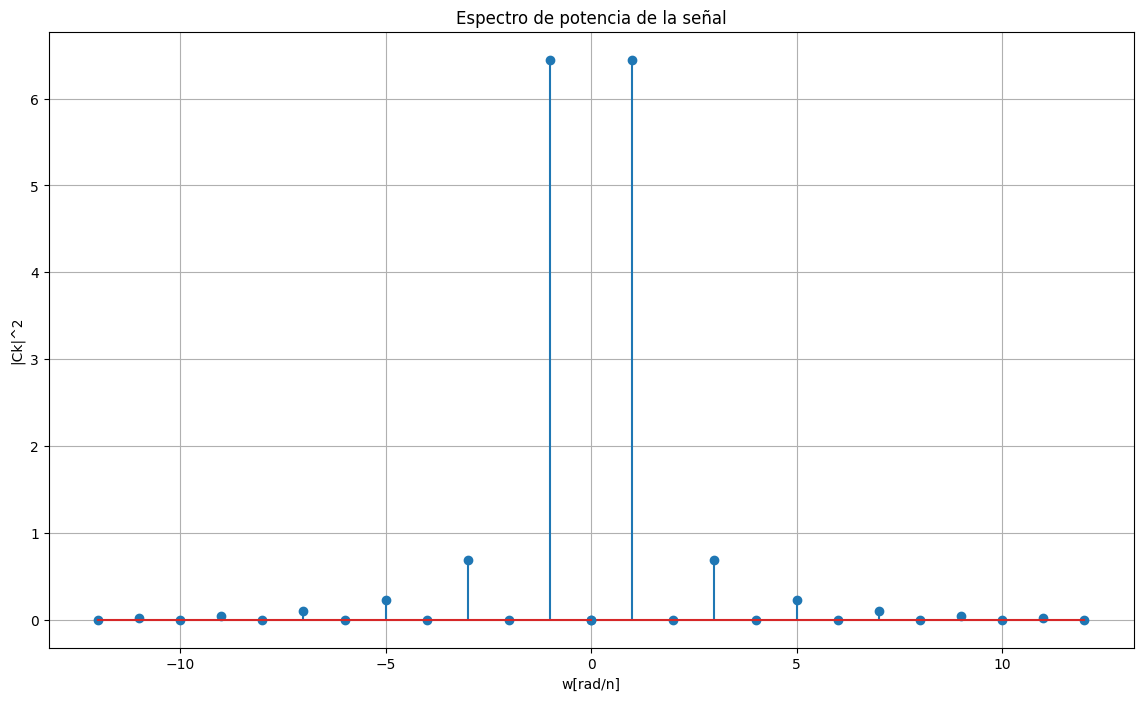

In [74]:
n1 = np.arange(0,len(C_k),1)
n2 = np.arange(-len(C_k)+1,1)
pot = abs(C_k)**2

plt.figure(figsize=(14,8))
plt.stem(n1, pot)
plt.stem(n2, np.flip(pot))
plt.xlabel("w[rad/n]")
plt.ylabel("|Ck|^2")
plt.title("Espectro de potencia de la señal")
plt.grid()
plt.show()

#3.3
Calcule la potencia de la señal a partir de los coeficientes encontrados y compruebe el teorema de Parseval.


In [75]:
pot2 = (1/N)*sum(abs(xn)**2)
print("Potencia de x[n] =", pot2)

potcof = sum(abs(C_k)**2)
print("Potencia de coeficientes =", potcof)
#no dan igual por el k del punto 2

Potencia de x[n] = 16.0
Potencia de coeficientes = 7.519168217013632


 ¿Obtuvo el resultado esperado? Explique.
 no,no da el resultado esperado debido a que el k que se uso anteriormente es de 12,para tener el valor esperado se encesitan infinitos coeficientes

Reconstruya la señal x(n) a partir de los coeficientes extraídos usando la ecuaci ́on de s ́ıntesis  
* Grafique y concluya acerca de la señal obtenida.

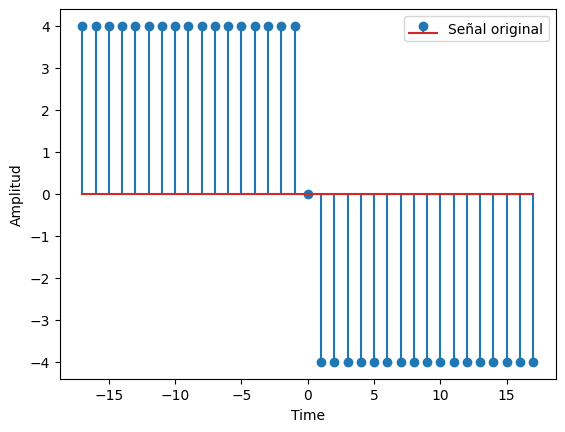

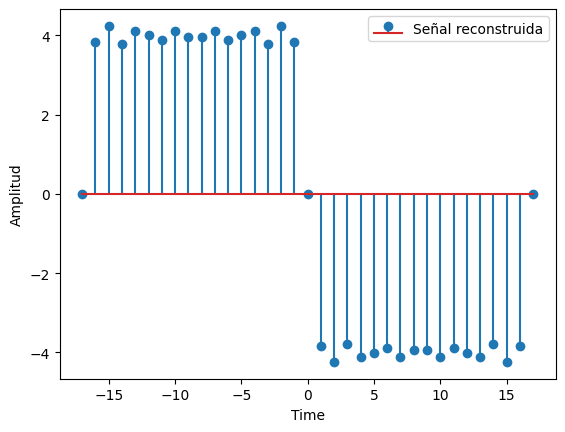

In [76]:
# Reconstruir la señal a partir de los coeficientes de Fourier
x_recons = np.zeros(len(n))
for i in range(len(n)):
    for k in range(k_max+1):
        x_recons[i] += par[k] * np.cos(2*np.pi*k*n[i]/N) + impar[k] * np.sin(2*(np.pi*k*n[i])/N)

# Graficar la señal original y la reconstruida
plt.figure()
plt.stem(n, xn, label='Señal original')
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

plt.figure()
plt.stem(n, 2*x_recons, label='Señal reconstruida')
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Repita el procedimiento anterior para un k = 5 y k = ( N/2 - 1).

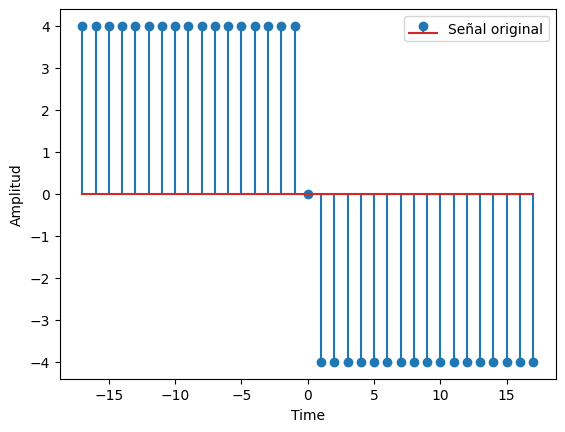

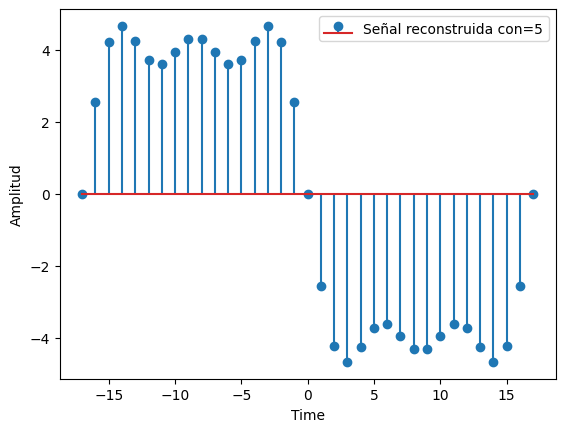

In [77]:
k_max = 5 # Valor máximo de k
par = np.zeros(k_max+1)
impar = np.zeros(k_max+1)
C_k = np.empty(k_max + 1,'complex_') # coeficientes real, imaginaria

for k in range(k_max+1):
    par[k] = 1/N * np.sum(xn * np.cos(2*np.pi*k*n/N))
    impar[k] = 1/N * np.sum(xn * np.sin(2*np.pi*k*n/N))
    C_k[k] = (1/N)*sum((xn)*np.exp((-2j*np.pi*k*n)/N))


# Reconstruir la señal a partir de los coeficientes de Fourier
x_recons = np.zeros(len(n))
for i in range(len(n)):
    for k in range(k_max+1):
        x_recons[i] += par[k] * np.cos(2*np.pi*k*n[i]/N) + impar[k] * np.sin(2*(np.pi*k*n[i])/N)

# Graficar la señal original y la reconstruida
plt.figure()
plt.stem(n, xn, label='Señal original')
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

plt.figure()
plt.stem(n, 2*x_recons, label='Señal reconstruida con='+str(k_max))
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

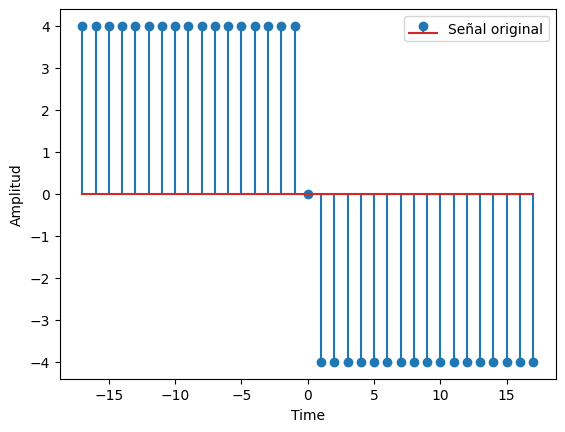

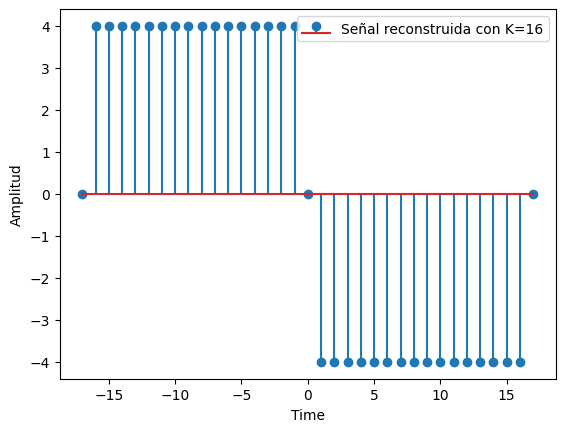

In [78]:
k_max = int(N/2)-1 # Valor máximo de k
par = np.zeros(k_max+1)
impar = np.zeros(k_max+1)
C_k = np.empty(k_max + 1,'complex_') # coeficientes real, imaginaria

for k in range(k_max+1):
    par[k] = 1/N * np.sum(xn * np.cos(2*np.pi*k*n/N))
    impar[k] = 1/N * np.sum(xn * np.sin(2*np.pi*k*n/N))
    C_k[k] = (1/N)*sum((xn)*np.exp((-2j*np.pi*k*n)/N))


# Reconstruir la señal a partir de los coeficientes de Fourier
x_recons = np.zeros(len(n))
for i in range(len(n)):
    for k in range(k_max+1):
        x_recons[i] += par[k] * np.cos(2*np.pi*k*n[i]/N) + impar[k] * np.sin(2*(np.pi*k*n[i])/N)

# Graficar la señal original y la reconstruida
plt.figure()
plt.stem(n, xn, label='Señal original')
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

plt.figure()
plt.stem(n, 2*x_recons, label='Señal reconstruida con K='+str(k_max))
plt.xlabel('Time')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

¿Que se puede observar al reducir y al incrementar el número de coeficientes?
al reducir el numero de coeficientes la reconstruccion de la señal es menos detallada se va pareciendo a  una señal coseno impar

¿Fue posible recuperar la señal en su totalidad? Cuántos coeficientes considera necesarios para recuperar

la señal en su totalidad. Explique.
No fue posible recuperar la señal en su totalidad utilizando sólo 5 coeficientes. Al comparar la señal original con la señal reconstruida se puede observar que hay una diferencia significativa en la forma de la señal, con 16 coeficientes si fue posible recuperar pero no exactamente, ya que para recuperar la señal en su totalidad se necesitarian infinitos coeficientes


#5. Conclusiones
* El primer coeficiente del espectro de potencia (C_1) es el que tiene la frecuencia fundamental, el resto son multiplos de la frecuencia, estas frecuencias siguientes son dos veces la frecuencia fundamental.

* La serie de Fourier será mejor y más aproximada entre más coeficientes se utilicen, almenos hasta llegar a la potencia total de la señal, para no desperdiciar cálculos.

* Para alcanzar el valor exacto de la potencia de parseval se necesitan infinitos coeficientes, lo que no es posible ya que se desbordaria el sistema.

* El número de coeficientes influye tanto en el resultado de la potencia como en la reconstruccion de esta, ya que a mas coeficientes mejor reconstruccion.

* Los coeficientes en cero se encuentran en la parte par, ya que se cumple que para señales impares desaparece la componente real por la sumatoria de las señales.